<a href="https://colab.research.google.com/github/akdrkr/Machine-Learning/blob/main/Arima_Bitcoin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

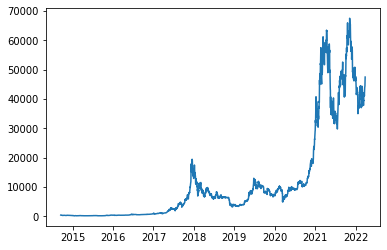

In [ ]:
plt.plot(df.index,df['Adj Close'])

In [ ]:
import statsmodels.api as sm

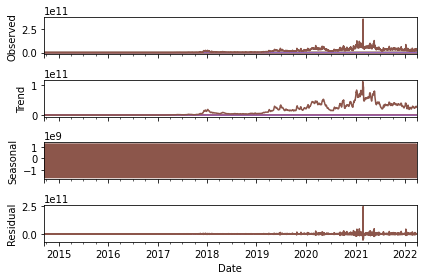

In [ ]:
decomposition =sm.tsa.seasonal_decompose(df,model='additive')
fig4=decomposition.plot()
plt.show()

In [ ]:
#Train test split
to_row=int(len(df)*0.9)
training_data= list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])
#training_data.last('3D')
#testing_data[-1]

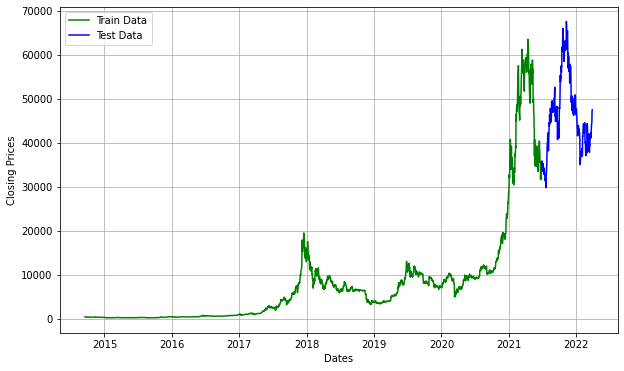

In [ ]:
#split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green' ,label='Train Data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test Data')
plt.legend()

In [ ]:
model_predictions=[]
n_test_obser = len(testing_data)



In [ ]:
for i in range(n_test_obser):
  model=ARIMA(training_data,order=(8,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)
  #print(output)


In [ ]:
list(output[0])[0]

46899.23345248828

In [ ]:
len(model_predictions)

275

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2748
Model:                 ARIMA(8, 1, 0)   Log Likelihood              -22225.010
Method:                       css-mle   S.D. of innovations            787.418
Date:                Mon, 28 Mar 2022   AIC                          44470.020
Time:                        14:52:57   BIC                          44529.206
Sample:                             1   HQIC                         44491.404
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8716     14.643      1.152      0.249     -11.828      45.571
ar.L1.D.y     -0.0250      0.019     -1.309      0.191      -0.062       0.012
ar.L2.D.y     -0.0037      0.019     -0.192      0.8

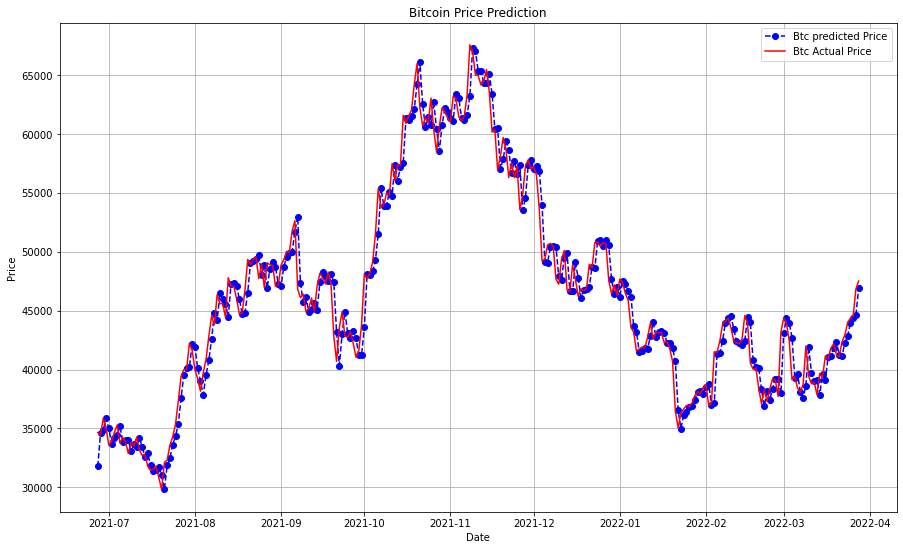

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
data_range=df[to_row:].index
plt.plot(data_range,model_predictions[:],color='blue',marker ='o',linestyle='dashed',label='Btc predicted Price')
plt.plot(data_range,testing_data,color='red',label='Btc Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()